In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os
import random

In [8]:
width = 128
height = 128
size = (width, height)
channels = 3

In [10]:
print(os.listdir("training"))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg', 'cat.1007.jpg', 'cat.1008.jpg', 'cat.1009.jpg', 'cat.101.jpg', 'cat.1010.jpg', 'cat.1011.jpg', 'cat.1012.jpg', 'cat.1013.jpg', 'cat.1014.jpg', 'cat.1015.jpg', 'cat.1016.jpg', 'cat.1017.jpg', 'cat.1018.jpg', 'cat.1019.jpg', 'cat.102.jpg', 'cat.1020.jpg', 'cat.1021.jpg', 'cat.1022.jpg', 'cat.1023.jpg', 'cat.1024.jpg', 'cat.1025.jpg', 'cat.1026.jpg', 'cat.1027.jpg', 'cat.1028.jpg', 'cat.1029.jpg', 'cat.103.jpg', 'cat.1030.jpg', 'cat.1031.jpg', 'cat.1032.jpg', 'cat.1033.jpg', 'cat.1034.jpg', 'cat.1035.jpg', 'cat.1036.jpg', 'cat.1037.jpg', 'cat.1038.jpg', 'cat.1039.jpg', 'cat.104.jpg', 'cat.1040.jpg', 'cat.1041.jpg', 'cat.1042.jpg', 'cat.1043.jpg', 'cat.1044.jpg', 'cat.1045.jpg', 'cat.1046.jpg', 'cat.1047.jpg', 'cat.1048.jpg', 'cat.1049.jpg', 'cat.105.jpg', 'cat.1050.jpg', 'cat.1051.jpg', 'cat.1052.jpg', 'cat.1053.jpg', 'cat.

In [11]:
name_files = os.listdir("training")
targets = []
for i in name_files:
    l = i.split('.')
    if(l[0]=='dog'):
        targets.append(1)
    else:
        targets.append(0)
        
df = pd.DataFrame({'Name':name_files,'target':targets})

In [12]:
df.head()

,Name,target
0,cat.0.jpg,0
1,cat.1.jpg,0
2,cat.10.jpg,0
3,cat.100.jpg,0
4,cat.1000.jpg,0


In [13]:
df.tail()

,Name,target
2428,dog.995.jpg,1
2429,dog.996.jpg,1
2430,dog.997.jpg,1
2431,dog.998.jpg,1
2432,dog.999.jpg,1


In [33]:
df.shape

(2433, 2)

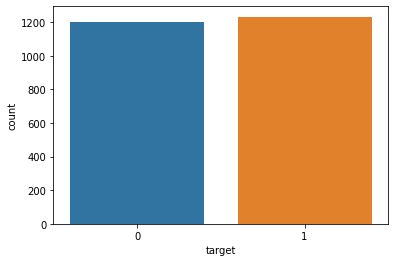

In [15]:
sns.countplot(df['target'])
plt.show()

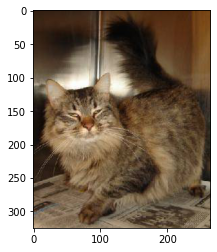

In [18]:
img = random.choice(name_files)
image = load_img('training/'+img)
plt.imshow(image)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [68]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(width,height,channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)       

In [70]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [71]:
#Because we will use image genaretor with class_mode="categorical". 
#We need to convert column category into string. Then imagenerator will 
#convert it one-hot encoding which is good for our classification.

df['target'] = df['target'].replace({0:'cat',1:'dog'})

In [72]:
df.head()

,Name,target
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


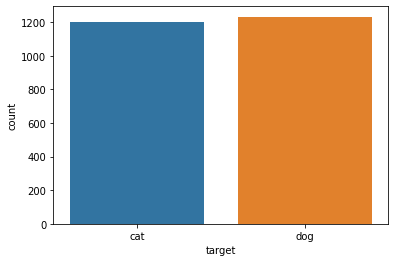

In [73]:
sns.countplot(df['target'])

In [105]:
df_train, df_test = train_test_split(df,test_size=0.10)

In [106]:
df_train, df_val = train_test_split(df, test_size=0.15)

In [76]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [77]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(2068, 2)
(244, 2)
(365, 2)


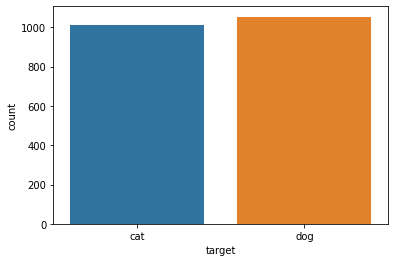

In [78]:
sns.countplot(df_train.target)

In [79]:
train_gen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_gen.flow_from_dataframe(
    df_train,
    'training/',
    x_col='Name',
    y_col='target',
    target_size=size,
    class_mode='categorical',
    batch_size=32
)

Found 2068 validated image filenames belonging to 2 classes.


In [80]:
val_generator = train_gen.flow_from_dataframe(
    df_val,
    'training/',
    x_col='Name',
    y_col='target',
    target_size=size,
    class_mode='categorical',
    batch_size=32
)

Found 365 validated image filenames belonging to 2 classes.


In [81]:
example_df = df_train.sample(n=1).reset_index(drop=True)
example_generator = train_gen.flow_from_dataframe(
    example_df, 
    "training/", 
    x_col='Name',
    y_col='target',
    target_size=size,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


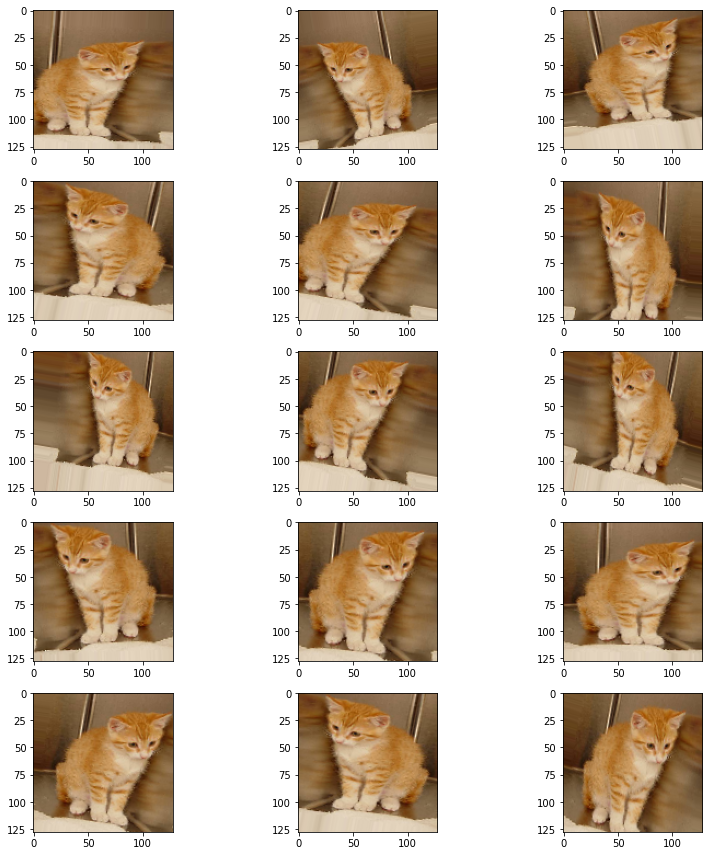

In [85]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [134]:
for X_batch, Y_batch in example_generator:
    print(X_batch[0].shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

KeyboardInterrupt: 

In [83]:
history = model.fit_generator(
    train_generator, 
    epochs=50,
    validation_data=val_generator,
    callbacks=[es,lr]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 65 steps, validate for 12 steps
Epoch 1/50
65/65 [==============================] - 12s 191ms/step - loss: 2.1404 - accuracy: 0.5426 - val_loss: 1.4923 - val_accuracy: 0.5123
Epoch 2/50
65/65 [==============================] - 11s 177ms/step - loss: 0.6674 - accuracy: 0.6165 - val_loss: 2.9806 - val_accuracy: 0.5123
Epoch 3/50
65/65 [==============================] - 12s 179ms/step - loss: 0.6308 - accuracy: 0.6422 - val_loss: 4.0002 - val_accuracy: 0.5123
Epoch 4/50
64/65 [============================>.] - ETA: 0s - loss: 0.6157 - accuracy: 0.6704
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
65/65 [==============================] - 12s 179ms/step - loss: 0.6163 - accuracy: 0.6688 - val_loss: 3.2438 - val_accuracy: 0.5123
Epoch 5/50
65/65 [==============================] - 12s 183ms/step - loss: 0.5758 - accuracy: 0.6833 - val_loss: 2.1870 - val_accuracy: 0.5123
Epoch 6/50
65/65 [============

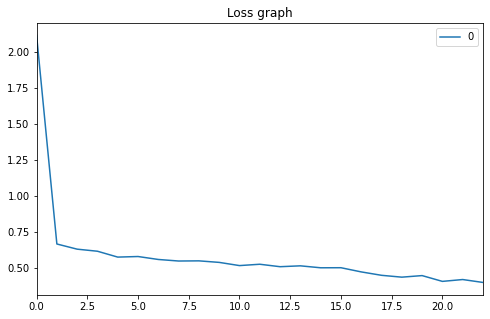

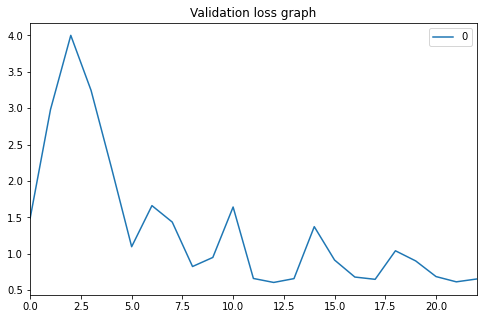

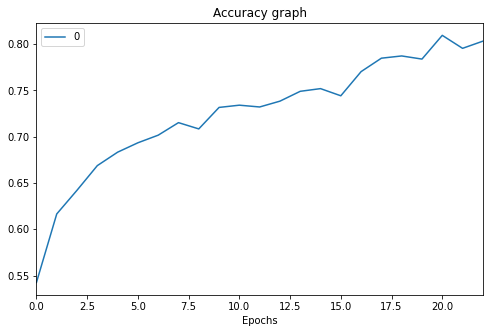

In [98]:
pd.DataFrame(history.history['loss']).plot(figsize=(8, 5))
plt.title('Loss graph')
pd.DataFrame(history.history['val_loss']).plot(figsize=(8, 5))
plt.title('Validation loss graph')
pd.DataFrame(history.history['accuracy']).plot(figsize=(8, 5))
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.show()

In [107]:
df_test.drop(['target'],axis=1,inplace=True)

In [108]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    "training", 
    x_col='Name',
    y_col=None,
    class_mode=None,
    target_size=size,
    batch_size=32,
    shuffle=False
)

Found 244 validated image filenames.


In [111]:
predict = model.predict(test_generator)

In [115]:
df_output = pd.DataFrame()
df_output['output'] = np.argmax(predict,axis=-1)

In [122]:
df_output.output

0      1
1      1
2      1
3      1
4      0
      ..
239    0
240    0
241    1
242    0
243    0
Name: output, Length: 244, dtype: int64

In [135]:
df_output.output.replace({0:'cat',1:'dog'},inplace=True)

In [144]:
df_output.output[0]

'dog'

In [145]:
df_test['Name'].iloc[1]

'dog.598.jpg'

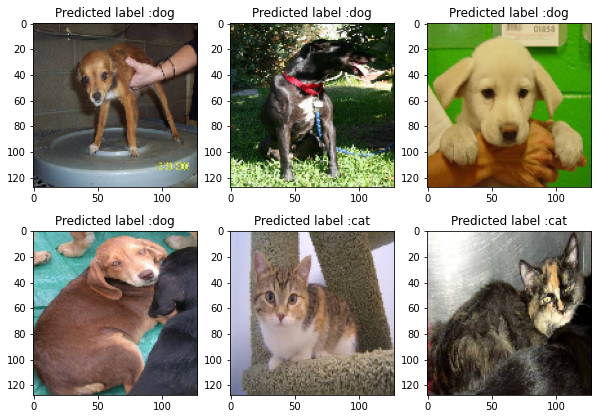

In [150]:
nrows = 2
ncols = 3
i=0;
fig, ax = plt.subplots(nrows,ncols)
fig.set_figheight(7)
fig.set_figwidth(10)
for row in range(nrows):
    for col in range(ncols):
        filename = df_test['Name'].iloc[i]
        img = load_img('training/'+filename,target_size=size)
        ax[row,col].imshow(img)
        ax[row,col].set_title("Predicted label :{}".format(df_output.output[i]))
        i=i+1